<a href="https://colab.research.google.com/github/mrinaligupta255/Practice-on-Keras-Library/blob/master/Plotting_History_During_Training_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras provides the capability to register callbacks when training a deep learning model. One of
the default callbacks that is registered when training all deep learning models is the History
callback. It records training metrics for each epoch. This includes the loss and the accuracy (for
classification problems) as well as the loss and accuracy for the validation dataset, if one is set.
The history object is returned from calls to the fit() function used to train the model.
Metrics are stored in a dictionary in the history member of the object returned.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


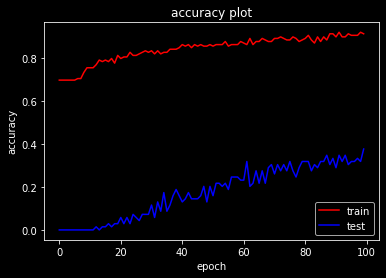

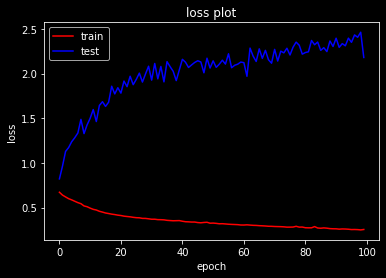

acc 73.07692307692307


In [13]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])  #for dark mode in colab
#to remove tensorflow update warnings from the output window
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

url='https://raw.githubusercontent.com/mrinaligupta255/Practice-on-Keras-Library/master/Binary%20Classification%20on%20Sonar%20Returns/sonar.csv'
dataframe=pd.read_csv(url,header=None)
data=dataframe.values
X=data[:,0:60]
Y=data[:,60]
encoder=LabelEncoder()
encoded_Y=encoder.fit_transform(Y)
seed=1

model=Sequential()
model.add(Dense(30,input_dim=60, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


history=model.fit(X,encoded_Y,validation_split=0.33,epochs=100,batch_size=5,verbose=0)
print(history.history.keys())

#plotting accuracy
plt.plot(history.history['acc'],color='r')
plt.plot(history.history['val_acc'],color='b')
plt.title('accuracy plot')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

#plotting loss
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.title('loss plot')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()
result=model.evaluate(X,encoded_Y,verbose=0)

print(model.metrics_names[1],result[1]*100)

 From the plot of accuracy we can see that
the model could probably be trained a little more as the trend for accuracy on both datasets is
still rising for the last few epochs. We can also see that the model has not yet over-learned the
training dataset, showing comparable skill on both datasets.



From the plot of loss, we can see that the model has comparable performance on both train
and validation datasets (labeled test). If these parallel plots start to depart consistently, it
might be a sign to stop training at an earlier epoch.